In [1]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

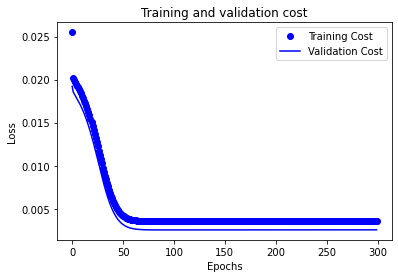

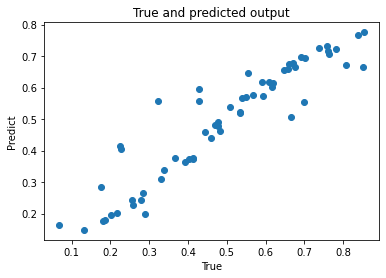

In [5]:
import matplotlib.pyplot as plt

# initialize learning rate
alpha = 0.1

# step c
w1 = np.random.uniform(-1, 1, (3, 2))
w2 = np.random.uniform(-1, 1, (1, 3))

b1 = np.zeros((3, 1))
b2 = np.zeros((1, 1))

# propagate inputs through network
def forward_propagation(x, w1, w2, b1, b2):
    z1 = np.dot(w1, x) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(w2, a1) + b2
    a2 = sigmoid(z2)
    return a1, a2

# sigmoid derivative for backwards propagation
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# compute gradient of loss function
def backward_propagation(x, y, a1, a2, w1, w2):
    # layer 1
    # z1
    layer1_pre_activation_loss = np.dot(w2.T, (a2 - y) * sigmoid_derivative(a2)) * sigmoid_derivative(a1)
    # layer1 weight gradient of loss 
    layer1_weight_loss = np.dot(layer1_pre_activation_loss, x.T)
    # layer1 bias gradient of loss 
    layer1_bias_loss = np.sum(layer1_pre_activation_loss, axis=1, keepdims=True)
    
    # layer 2
    #
    output_error = a2 - y
    # z2
    layer2_pre_activation_loss = output_error * sigmoid_derivative(a2)
    # # layer2 weight gradient of loss 
    layer2_weight_loss = np.dot(layer2_pre_activation_loss, a1.T)
    # layer2 bias gradient of loss 
    layer2_bias_loss = np.sum(layer2_pre_activation_loss, axis=1, keepdims=True)

    return layer1_weight_loss, layer1_bias_loss, layer2_weight_loss, layer2_bias_loss

# gradient descent of parameters
def gradient_descent(w1, w2, b1, b2, layer1_weight_loss, layer1_bias_loss, layer2_weight_loss, layer2_bias_loss, alpha):
    # update weight/bias for layer 1
    w1 -= alpha * layer1_weight_loss
    b1 -= alpha * layer1_bias_loss

    # update weight/bias for layer 2
    w2 -= alpha * layer2_weight_loss
    b2 -= alpha * layer2_bias_loss

# step d
def run_epoch(x_train, y_train, x_valid, y_valid, w1, w2, b1, b2, alpha):
    
    train_loss = 0
    for i in range(len(x_train)):
        x_sample = np.array(x_train[i]).reshape(-1, 1)
        y_sample = np.array(y_train[i]).reshape(-1, 1)

        # forward
        a1, a2 = forward_propagation(x_sample, w1, w2, b1, b2)
        train_loss += 0.5 * np.mean((y_sample - a2) ** 2)

        # backward
        layer1_weight_grad, layer1_bias_grad, layer2_weight_grad, layer2_bias_grad = backward_propagation(x_sample, y_sample, a1, a2, w1, w2)
        
        # gradient descent
        gradient_descent(w1, w2, b1, b2, layer1_weight_grad, layer1_bias_grad, layer2_weight_grad, layer2_bias_grad, alpha)

    train_loss /= len(x_train)

    valid_loss = 0
    for i in range(len(x_valid)):
        x_sample = np.array(x_valid[i]).reshape(-1, 1)
        y_sample = np.array(y_valid[i]).reshape(-1, 1)
        
        # forward
        _, a2 = forward_propagation(x_sample, w1, w2, b1, b2)
        valid_loss += 0.5 * np.mean((y_sample - a2) ** 2)

    valid_loss /= len(x_valid)
    
    return train_loss, valid_loss

epochs = 300
train_loss_history = []
valid_loss_history = []

# run epoch
for epoch in range(epochs):
    train_loss, valid_loss = run_epoch(x_train, y_train, x_valid, y_valid, w1, w2, b1, b2, alpha)
    train_loss_history.append(train_loss)
    valid_loss_history.append(valid_loss)

# plot training and validation cost
plt.plot(train_loss_history, color='blue', marker='o', linestyle='', label='Training Cost')
plt.plot(valid_loss_history, color='blue', linestyle='-', label='Validation Cost')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Training and validation cost")
plt.legend()
plt.show()

# step g 
y_pred = []
for x_sample in x_test:
    x_sample = np.array(x_sample).reshape(-1, 1)
    # run forward prop to get predicted value
    _, a2 = forward_propagation(x_sample, w1, w2, b1, b2)
    y_pred.append(a2.item())

# plot true and predicted output
plt.scatter(y_test, y_pred)
plt.xlabel('True')
plt.ylabel('Predict')
plt.title('True and predicted output')
plt.show()